# Handwritten Text Recognition - French Dataset Analysis


## Setup and Library Imports

Enable autoreloading of modules for interactive development


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from core.config.config import Config

config = Config()

## Data Loading and Initial Inspection


In [4]:
rimas_train_set = pd.read_csv(config.TRAIN_CSV_PATH, sep=',')
rimas_train_set.head()

,Filenames,Contents
0,train2011-1000_000001.jpg,"Suite à l'annonce d'un heureux événement,"
1,train2011-1000_000002.jpg,mon adresse a changé. Veuillez noter mes nouve...
2,train2011-1000_000003.jpg,coordonnées ci-dessus indiquées ainsi que mon
3,train2011-1000_000004.jpg,nouveau numéro de téléphone.
4,train2011-1000_000005.jpg,Merci de m'envoyer mon prochain colis à


In [17]:
rimas_test_set = pd.read_csv(config.TEST_CSV_PATH)
rimas_test_set.head()

,Filenames,Contents
0,eval2011-0_000001.jpg,Comme indiqué dans les conditions particulière...
1,eval2011-0_000002.jpg,"habitation n° DPUET36, je souhaite vous faire ..."
2,eval2011-0_000003.jpg,"de mon domicile du 3 Rue Gambetta, 57000 METZ,..."
3,eval2011-0_000004.jpg,2007.
4,eval2011-0_000005.jpg,Je souhaite donc que vous procédiez à la résil...


## Image Processing and Segmentation


### Image Processing

In [18]:
from core_legacy.helpers.data_cleaning.data_cleaning import build_image_label_dataset

In [19]:
rimas_processed_df = build_image_label_dataset(rimas_train_set, config.TRAIN_IMG_DIR)

Processing images: 100%|██████████| 10188/10188 [00:35<00:00, 289.91it/s]


In [20]:
rimas_processed_df

,image,label,filename
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","Suite à l'annonce d'un heureux événement,",train2011-1000_000001.jpg
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",mon adresse a changé. Veuillez noter mes nouve...,train2011-1000_000002.jpg
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",coordonnées ci-dessus indiquées ainsi que mon,train2011-1000_000003.jpg
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",nouveau numéro de téléphone.,train2011-1000_000004.jpg
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Merci de m'envoyer mon prochain colis à,train2011-1000_000005.jpg
...,...,...,...
10183,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",de poursuivre mon abonnement (Référence client...,train2011-999_000003.jpg
10184,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Vous trouverez ci-joint mon nouveau RIB.,train2011-999_000004.jpg
10185,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",Dans l'attente de la parution de votre nouveau...,train2011-999_000005.jpg
10186,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","je vous prie d'agréer, Madame, Monsieur, l'exp...",train2011-999_000006.jpg


### Words Processing Pipeline


In [21]:
from core_legacy.helpers.word_segmentation.word_segmentation import process_image_row, build_full_word_dataframe
from core_legacy.helpers.word_segmentation.word_processing import crop_word_to_content
from core_legacy.helpers.eda.visualization import compare_croped_img

c:\Users\kpozniak\RIMAS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


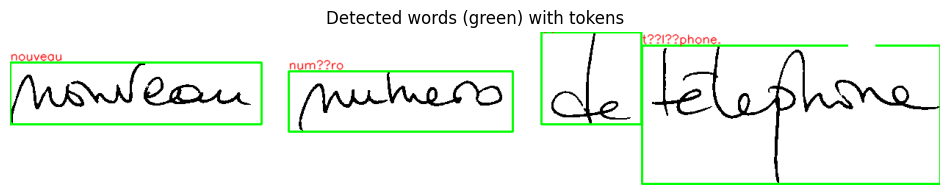

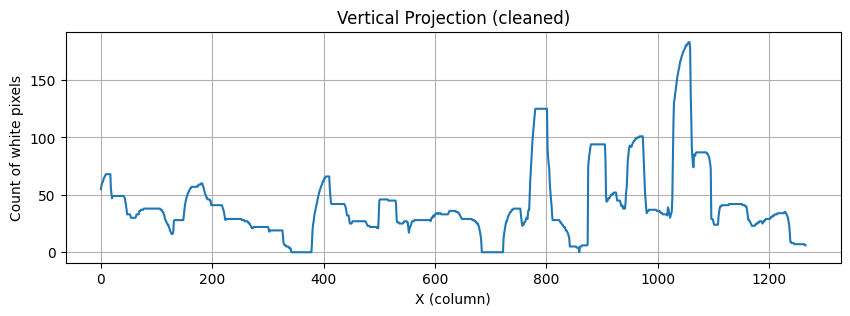

In [22]:
row_idx = 3
process_image_row(rimas_processed_df ,row_idx)

In [23]:
os.makedirs(config.OUTPUT_WORD_CSV_PATH, exist_ok=True)
output_path = os.path.join(config.OUTPUT_WORD_CSV_PATH, "rimes_words_df.csv")
rimas_words_df = build_full_word_dataframe(rimas_processed_df, output_path)

row 0: contours=7 tokens=6
row 1: contours=7 tokens=8
row 2: contours=7 tokens=6
row 4: contours=6 tokens=7
row 6: contours=2 tokens=1
row 7: contours=9 tokens=8
row 12: contours=4 tokens=3
row 13: contours=8 tokens=6
row 15: contours=6 tokens=5
row 17: contours=8 tokens=7
row 18: contours=10 tokens=7
row 20: contours=6 tokens=5
row 21: contours=9 tokens=10
row 22: contours=7 tokens=6
row 23: contours=3 tokens=2
row 24: contours=11 tokens=8
row 25: contours=9 tokens=7
row 26: contours=4 tokens=6
row 27: contours=9 tokens=8
row 28: contours=3 tokens=4
row 29: contours=8 tokens=9
row 30: contours=4 tokens=7
row 31: contours=7 tokens=8
row 32: contours=2 tokens=1
row 33: contours=6 tokens=9
row 34: contours=9 tokens=5
row 37: contours=8 tokens=9
row 38: contours=7 tokens=6
row 41: contours=10 tokens=8
row 42: contours=5 tokens=4
row 43: contours=6 tokens=5
row 45: contours=10 tokens=8
row 49: contours=2 tokens=1
row 54: contours=4 tokens=11
row 55: contours=6 tokens=10
row 56: contours=9 

In [24]:
rimas_processed_words_df = crop_word_to_content(rimas_words_df)

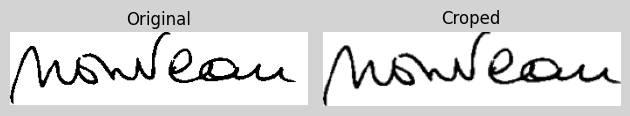

In [25]:
idx = 0
compare_croped_img(rimas_words_df, rimas_processed_words_df, idx)

### Save word images and write json file with filename and label for each word

In [26]:
from core_legacy.helpers.word_segmentation.word_processing import save_to_folder

In [28]:

save_to_folder(rimas_processed_words_df, output_path=config.OUTPUT_WORD_CSV_PATH)

Done! Images: C:\Users\kpozniak\RIMAS\src\data\processed\words\word
Json: C:\Users\kpozniak\RIMAS\src\data\processed\words\words.json
